In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.naive_bayes import MultinomialNB

In [2]:
data = pd.read_csv("incomplete_lyrics.csv")

In [3]:
data['album']=""
data['year']=0

In [4]:
data.head()

,lyrics,title,album,year
0,<div>\n<!-- Usage of azlyrics.com content by a...,Bastard,,0
1,<div>\n<!-- Usage of azlyrics.com content by a...,Seven,,0
2,<div>\n<!-- Usage of azlyrics.com content by a...,Odd Toddlers,,0
3,<div>\n<!-- Usage of azlyrics.com content by a...,French!,,0
4,<div>\n<!-- Usage of azlyrics.com content by a...,Blow,,0


In [5]:
for i in list(range(0,15)):
    data['album'][i] = 'Bastard'
    data['year'][i] = 2009

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
data.iloc[0:16]

,lyrics,title,album,year
0,<div>\n<!-- Usage of azlyrics.com content by a...,Bastard,Bastard,2009
1,<div>\n<!-- Usage of azlyrics.com content by a...,Seven,Bastard,2009
2,<div>\n<!-- Usage of azlyrics.com content by a...,Odd Toddlers,Bastard,2009
3,<div>\n<!-- Usage of azlyrics.com content by a...,French!,Bastard,2009
4,<div>\n<!-- Usage of azlyrics.com content by a...,Blow,Bastard,2009
5,<div>\n<!-- Usage of azlyrics.com content by a...,Pigs Fly,Bastard,2009
6,<div>\n<!-- Usage of azlyrics.com content by a...,Parade,Bastard,2009
7,<div>\n<!-- Usage of azlyrics.com content by a...,Slow It Down,Bastard,2009
8,<div>\n<!-- Usage of azlyrics.com content by a...,AssMilk,Bastard,2009
9,<div>\n<!-- Usage of azlyrics.com content by a...,VCR / Wheels,Bastard,2009


In [7]:
data.iloc[15:32]

,lyrics,title,album,year
15,<div>\n<!-- Usage of azlyrics.com content by a...,Goblin,,0
16,<div>\n<!-- Usage of azlyrics.com content by a...,Yonkers,,0
17,<div>\n<!-- Usage of azlyrics.com content by a...,Radicals,,0
18,<div>\n<!-- Usage of azlyrics.com content by a...,She,,0
19,<div>\n<!-- Usage of azlyrics.com content by a...,Transylvania,,0
20,<div>\n<!-- Usage of azlyrics.com content by a...,Nightmare,,0
21,<div>\n<!-- Usage of azlyrics.com content by a...,Tron Cat,,0
22,<div>\n<!-- Usage of azlyrics.com content by a...,Her,,0
23,<div>\n<!-- Usage of azlyrics.com content by a...,Sandwitches,,0
24,<div>\n<!-- Usage of azlyrics.com content by a...,Fish,,0


In [8]:
for i in list(range(15,32)):
    data['album'][i] = 'Goblin'
    data['year'][i] = 2011

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
data.iloc[15:33]

,lyrics,title,album,year
15,<div>\n<!-- Usage of azlyrics.com content by a...,Goblin,Goblin,2011
16,<div>\n<!-- Usage of azlyrics.com content by a...,Yonkers,Goblin,2011
17,<div>\n<!-- Usage of azlyrics.com content by a...,Radicals,Goblin,2011
18,<div>\n<!-- Usage of azlyrics.com content by a...,She,Goblin,2011
19,<div>\n<!-- Usage of azlyrics.com content by a...,Transylvania,Goblin,2011
20,<div>\n<!-- Usage of azlyrics.com content by a...,Nightmare,Goblin,2011
21,<div>\n<!-- Usage of azlyrics.com content by a...,Tron Cat,Goblin,2011
22,<div>\n<!-- Usage of azlyrics.com content by a...,Her,Goblin,2011
23,<div>\n<!-- Usage of azlyrics.com content by a...,Sandwitches,Goblin,2011
24,<div>\n<!-- Usage of azlyrics.com content by a...,Fish,Goblin,2011


In [10]:
data.iloc[32:50]

,lyrics,title,album,year
32,<div>\n<!-- Usage of azlyrics.com content by a...,Wolf,,0
33,<div>\n<!-- Usage of azlyrics.com content by a...,Jamba,,0
34,<div>\n<!-- Usage of azlyrics.com content by a...,Cowboy,,0
35,<div>\n<!-- Usage of azlyrics.com content by a...,Awkward,,0
36,<div>\n<!-- Usage of azlyrics.com content by a...,Domo23,,0
37,<div>\n<!-- Usage of azlyrics.com content by a...,Answer,,0
38,<div>\n<!-- Usage of azlyrics.com content by a...,Slater,,0
39,<div>\n<!-- Usage of azlyrics.com content by a...,48,,0
40,<div>\n<!-- Usage of azlyrics.com content by a...,Colossus,,0
41,<div>\n<!-- Usage of azlyrics.com content by a...,PartyIsntOver / Campfire / Bimmer,,0


In [11]:
for i in list(range(32,50)):
    data['album'][i] = 'Wolf'
    data['year'][i] = 2013

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
data.iloc[32:51]

,lyrics,title,album,year
32,<div>\n<!-- Usage of azlyrics.com content by a...,Wolf,Wolf,2013
33,<div>\n<!-- Usage of azlyrics.com content by a...,Jamba,Wolf,2013
34,<div>\n<!-- Usage of azlyrics.com content by a...,Cowboy,Wolf,2013
35,<div>\n<!-- Usage of azlyrics.com content by a...,Awkward,Wolf,2013
36,<div>\n<!-- Usage of azlyrics.com content by a...,Domo23,Wolf,2013
37,<div>\n<!-- Usage of azlyrics.com content by a...,Answer,Wolf,2013
38,<div>\n<!-- Usage of azlyrics.com content by a...,Slater,Wolf,2013
39,<div>\n<!-- Usage of azlyrics.com content by a...,48,Wolf,2013
40,<div>\n<!-- Usage of azlyrics.com content by a...,Colossus,Wolf,2013
41,<div>\n<!-- Usage of azlyrics.com content by a...,PartyIsntOver / Campfire / Bimmer,Wolf,2013


In [13]:
data.iloc[50:65]

,lyrics,title,album,year
50,<div>\n<!-- Usage of azlyrics.com content by a...,DEATHCAMP,,0
51,<div>\n<!-- Usage of azlyrics.com content by a...,BUFFALO,,0
52,<div>\n<!-- Usage of azlyrics.com content by a...,PILOT,,0
53,<div>\n<!-- Usage of azlyrics.com content by a...,RUN,,0
54,<div>\n<!-- Usage of azlyrics.com content by a...,FIND YOUR WINGS,,0
55,<div>\n<!-- Usage of azlyrics.com content by a...,CHERRY BOMB,,0
56,<div>\n<!-- Usage of azlyrics.com content by a...,BLOW MY LOAD,,0
57,<div>\n<!-- Usage of azlyrics.com content by a...,2SEATER,,0
58,<div>\n<!-- Usage of azlyrics.com content by a...,THE BROWN STAINS OF DARKEESE LATIFAH PART 6-12...,,0
59,<div>\n<!-- Usage of azlyrics.com content by a...,FUCKING YOUNG / PERFECT,,0


In [14]:
for i in list(range(50,65)):
    data['album'][i] = 'Cherry Bomb'
    data['year'][i] = 2015

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
data.iloc[50:66]

,lyrics,title,album,year
50,<div>\n<!-- Usage of azlyrics.com content by a...,DEATHCAMP,Cherry Bomb,2015
51,<div>\n<!-- Usage of azlyrics.com content by a...,BUFFALO,Cherry Bomb,2015
52,<div>\n<!-- Usage of azlyrics.com content by a...,PILOT,Cherry Bomb,2015
53,<div>\n<!-- Usage of azlyrics.com content by a...,RUN,Cherry Bomb,2015
54,<div>\n<!-- Usage of azlyrics.com content by a...,FIND YOUR WINGS,Cherry Bomb,2015
55,<div>\n<!-- Usage of azlyrics.com content by a...,CHERRY BOMB,Cherry Bomb,2015
56,<div>\n<!-- Usage of azlyrics.com content by a...,BLOW MY LOAD,Cherry Bomb,2015
57,<div>\n<!-- Usage of azlyrics.com content by a...,2SEATER,Cherry Bomb,2015
58,<div>\n<!-- Usage of azlyrics.com content by a...,THE BROWN STAINS OF DARKEESE LATIFAH PART 6-12...,Cherry Bomb,2015
59,<div>\n<!-- Usage of azlyrics.com content by a...,FUCKING YOUNG / PERFECT,Cherry Bomb,2015


In [16]:
data.iloc[65:78]

,lyrics,title,album,year
65,<div>\n<!-- Usage of azlyrics.com content by a...,Foreword,,0
66,<div>\n<!-- Usage of azlyrics.com content by a...,Where This Flower Blooms,,0
67,<div>\n<!-- Usage of azlyrics.com content by a...,Sometimes...,,0
68,<div>\n<!-- Usage of azlyrics.com content by a...,See You Again,,0
69,<div>\n<!-- Usage of azlyrics.com content by a...,Who Dat Boy,,0
70,<div>\n<!-- Usage of azlyrics.com content by a...,Pothole,,0
71,<div>\n<!-- Usage of azlyrics.com content by a...,Garden Shed,,0
72,<div>\n<!-- Usage of azlyrics.com content by a...,Boredom,,0
73,<div>\n<!-- Usage of azlyrics.com content by a...,I Ain't Got Time!,,0
74,<div>\n<!-- Usage of azlyrics.com content by a...,911 / Mr. Lonely,,0


In [17]:
for i in list(range(65,78)):
    data['album'][i] = 'Flower Boy'
    data['year'][i] = 2017

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
data.iloc[64:79]

,lyrics,title,album,year
64,<div>\n<!-- Usage of azlyrics.com content by a...,Special,Cherry Bomb,2015
65,<div>\n<!-- Usage of azlyrics.com content by a...,Foreword,Flower Boy,2017
66,<div>\n<!-- Usage of azlyrics.com content by a...,Where This Flower Blooms,Flower Boy,2017
67,<div>\n<!-- Usage of azlyrics.com content by a...,Sometimes...,Flower Boy,2017
68,<div>\n<!-- Usage of azlyrics.com content by a...,See You Again,Flower Boy,2017
69,<div>\n<!-- Usage of azlyrics.com content by a...,Who Dat Boy,Flower Boy,2017
70,<div>\n<!-- Usage of azlyrics.com content by a...,Pothole,Flower Boy,2017
71,<div>\n<!-- Usage of azlyrics.com content by a...,Garden Shed,Flower Boy,2017
72,<div>\n<!-- Usage of azlyrics.com content by a...,Boredom,Flower Boy,2017
73,<div>\n<!-- Usage of azlyrics.com content by a...,I Ain't Got Time!,Flower Boy,2017


In [19]:
data.iloc[78:82]

,lyrics,title,album,year
78,<div>\n<!-- Usage of azlyrics.com content by a...,Lights On,,0
79,<div>\n<!-- Usage of azlyrics.com content by a...,Hot Chocolate,,0
80,<div>\n<!-- Usage of azlyrics.com content by a...,Big Bag,,0
81,<div>\n<!-- Usage of azlyrics.com content by a...,When Gloves Come Off,,0


In [20]:
for i in list(range(78,82)):
    data['album'][i] = "Music Inspired By Illumination & Dr. Seuss' The Grinch"
    data['year'][i] = 2018

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
data.iloc[77:83]

,lyrics,title,album,year
77,<div>\n<!-- Usage of azlyrics.com content by a...,Glitter,Flower Boy,2017
78,<div>\n<!-- Usage of azlyrics.com content by a...,Lights On,Music Inspired By Illumination & Dr. Seuss' Th...,2018
79,<div>\n<!-- Usage of azlyrics.com content by a...,Hot Chocolate,Music Inspired By Illumination & Dr. Seuss' Th...,2018
80,<div>\n<!-- Usage of azlyrics.com content by a...,Big Bag,Music Inspired By Illumination & Dr. Seuss' Th...,2018
81,<div>\n<!-- Usage of azlyrics.com content by a...,When Gloves Come Off,Music Inspired By Illumination & Dr. Seuss' Th...,2018
82,<div>\n<!-- Usage of azlyrics.com content by a...,IGOR'S THEME,,0


In [22]:
data.iloc[82:94]

,lyrics,title,album,year
82,<div>\n<!-- Usage of azlyrics.com content by a...,IGOR'S THEME,,0
83,<div>\n<!-- Usage of azlyrics.com content by a...,EARFQUAKE,,0
84,<div>\n<!-- Usage of azlyrics.com content by a...,I THINK,,0
85,<div>\n<!-- Usage of azlyrics.com content by a...,EXACTLY WHAT YOU RUN FROM YOU END UP CHASING,,0
86,<div>\n<!-- Usage of azlyrics.com content by a...,RUNNING OUT OF TIME,,0
87,<div>\n<!-- Usage of azlyrics.com content by a...,NEW MAGIC WAND,,0
88,<div>\n<!-- Usage of azlyrics.com content by a...,A BOY IS A GUN,,0
89,<div>\n<!-- Usage of azlyrics.com content by a...,PUPPET,,0
90,<div>\n<!-- Usage of azlyrics.com content by a...,WHAT'S GOOD,,0
91,<div>\n<!-- Usage of azlyrics.com content by a...,"GONE, GONE / THANK YOU",,0


In [23]:
for i in list(range(82,94)):
    data['album'][i] = "IGOR"
    data['year'][i] = 2019

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
data.album.value_counts()

                                                          19
Wolf                                                      18
Goblin                                                    17
Cherry Bomb                                               15
Bastard                                                   15
Flower Boy                                                13
IGOR                                                      12
Music Inspired By Illumination & Dr. Seuss' The Grinch     4
Name: album, dtype: int64

In [25]:
len(data)

113

In [26]:
major_releases=data[
    (data['album'] == 'IGOR')
    | (data['album'] == 'Flower Boy')
    | (data['album'] == 'Cherry Bomb')
    | (data['album'] == 'Bastard')
    | (data['album'] == 'Goblin')
    | (data['album'] == 'Wolf')
    
    ]

In [27]:
len(major_releases)

90

In [28]:
major_releases['lyrics'].iloc[0]

'<div>\n<!-- Usage of azlyrics.com content by any third-party lyrics provider is prohibited by our licensing agreement. Sorry about that. -->\r\nThis is what the devil plays before he goes to sleep<br/>\nSome food for thought some food for death, go \'head and fuckin\' eat<br/>\nMy father\'s dead well I don\'t know, we\'ll never fuckin\' meet<br/>\nI cut my wrist and play piano cause I\'m so depressed<br/>\nSomebody call the pastor, this bastard is so posessed<br/>\nThis meetin\' just begun, nigga I\'m Satan\'s son<br/>\n<br/>\nMy mother raised me a single parent so it\'s apparent<br/>\nThat I got love for my mother, none of you other fuckas<br/>\nAre much important I\'m gettin\' angrier while recordin\'<br/>\nI\'m feelin\' like the Bulls, I\'ve got a Gang of Wolves<br/>\nOdd Future is children that\'s fucked up on they mental<br/>\nSimple but probably not, fuck \'em<br/>\n<br/>\nI\'m tall, dark, skinny, my ears are big as fuck<br/>\nDrunk white girls the only way I\'ll get my dick suc

In [29]:
major_releases.to_csv("major_releases.csv",index=False)

In [30]:
major_releases_df = pd.read_csv("major_releases.csv")

In [31]:
major_releases_df['album'].value_counts()

Wolf           18
Goblin         17
Cherry Bomb    15
Bastard        15
Flower Boy     13
IGOR           12
Name: album, dtype: int64

In [32]:
major_releases_df.head()

,lyrics,title,album,year
0,<div>\n<!-- Usage of azlyrics.com content by a...,Bastard,Bastard,2009
1,<div>\n<!-- Usage of azlyrics.com content by a...,Seven,Bastard,2009
2,<div>\n<!-- Usage of azlyrics.com content by a...,Odd Toddlers,Bastard,2009
3,<div>\n<!-- Usage of azlyrics.com content by a...,French!,Bastard,2009
4,<div>\n<!-- Usage of azlyrics.com content by a...,Blow,Bastard,2009


In [33]:
major_releases_df['lyrics']=major_releases_df['lyrics'].replace('<div>\n<!-- Usage of azlyrics.com content by any third-party lyrics provider is prohibited by our licensing agreement. Sorry about that. -->',"")\
.replace('\r',"").replace('\n',"").replace('<br>'," ").replace('<br/>',' ').replace('</div>',"")\



In [34]:
for i in range(len(major_releases_df['lyrics'])):
    
    major_releases_df['lyrics'][i]=\
    major_releases_df['lyrics'][i].replace('<div>\n<!-- Usage of azlyrics.com content by any third-party lyrics provider is prohibited by our licensing agreement. Sorry about that. -->',"").replace('\r',"").replace('\n',"").replace('<br>'," ").replace('<br/>',' ').replace('</div>',"")



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [35]:
#from a heather robins lesson

corpus = list(major_releases_df['lyrics'])
corpus[1]

'I\'d tell him to eat a dick quicker than Mexicans sprint over borders I give a fuck like a quarter with 20 cent At Hamptons with Fred Hampton relaxin\' at Happy Camper It\'s the fuckin\' financial aid at Hamptons wasn\'t relaxin\', I\'m taxin\' "Fuck \'em all!" I\'m chantin\', don\'t complain I\'m just rantin\' Fuck ranking, I\'m the best, I\'m the champion\'s chariot I\'m a liar like Carrey in "Liar, Liar" I\'m dirtier than the sheets in the Marriott, Cable guy like Larry Peter Pan in my youth, fucking fairies I\'m using my tooth bait to get that bitches teeth paste Fuck it, Odd Future some nazis, black nazis don\'t copy We perfect, you sloppy, huddled and slightly tacky Fuck a label on my jacket, screw you like a ratchet Screw you like a black teen on Judge Hatchett Endotherms and jaguars, drug dealers and crackers Able students and slackers I\'m backwards like Jermaine Dupri in \'93 Escaping from concentration camps with a fucking girl born in a ramp That I ordered from CCS with so

In [36]:
sia = SentimentIntensityAnalyzer()

In [37]:
dicts = []    

for song in corpus:
    scores = sia.polarity_scores(song)
    scores['lyrics'] = song
    dicts.append(scores)

df = pd.DataFrame(dicts)
df.head()

,neg,neu,pos,compound,lyrics
0,0.230,0.643,0.127,-0.9991,This is what the devil plays before he goes to...
1,0.232,0.675,0.093,-0.9984,I'd tell him to eat a dick quicker than Mexica...
2,0.158,0.718,0.124,-0.9527,"Hello, the Hype is so Mellow Bitch I'm dope an..."
3,0.196,0.696,0.108,-0.9970,Got all the black bitches mad cause my main bi...
4,0.207,0.658,0.136,-0.9948,If this was a game I already know that I would...


In [38]:
df['album'] = major_releases_df['album'].values
df['year'] = major_releases_df['year'].values
df.head()

,neg,neu,pos,compound,lyrics,album,year
0,0.230,0.643,0.127,-0.9991,This is what the devil plays before he goes to...,Bastard,2009
1,0.232,0.675,0.093,-0.9984,I'd tell him to eat a dick quicker than Mexica...,Bastard,2009
2,0.158,0.718,0.124,-0.9527,"Hello, the Hype is so Mellow Bitch I'm dope an...",Bastard,2009
3,0.196,0.696,0.108,-0.9970,Got all the black bitches mad cause my main bi...,Bastard,2009
4,0.207,0.658,0.136,-0.9948,If this was a game I already know that I would...,Bastard,2009


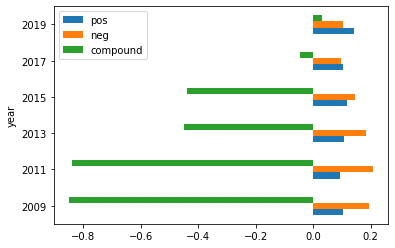

In [39]:
df.groupby('year').mean()[['pos', 'neg', 'compound']].plot(kind='barh')

In [40]:
df.to_csv('tyler_sentiment.csv')

In [41]:
sentiment = pd.read_csv('tyler_sentiment.csv')

In [42]:
sentiment.drop('Unnamed: 0',axis=1,inplace=True)

In [43]:
grouped_by_album=pd.DataFrame(sentiment.groupby('album').mean()[['pos', 'neg', 'compound']])

In [44]:
grouped_by_album.index

Index(['Bastard', 'Cherry Bomb', 'Flower Boy', 'Goblin', 'IGOR', 'Wolf'], dtype='object', name='album')

In [45]:
grouped_by_album

,pos,neg,compound
album,,,
Bastard,0.102267,0.193533,-0.849980
Cherry Bomb,0.116533,0.145933,-0.438253
Flower Boy,0.102923,0.096538,-0.047846
Goblin,0.091765,0.208176,-0.840494
IGOR,0.142250,0.102083,0.030125
Wolf,0.107111,0.182500,-0.448872


In [46]:
grouped_by_album=grouped_by_album.reindex(['Bastard','Goblin','Wolf','Cherry Bomb','Flower Boy','IGOR'])

Text(0.5, 1.0, 'Tyler the Creator Albums\nBy Their Sentiment Score')

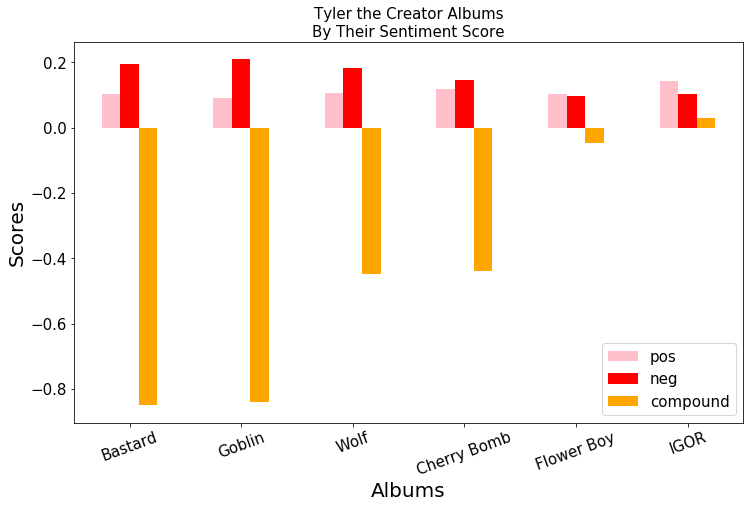

In [47]:

grouped_by_album.plot(figsize=(12,7),kind='bar',color=['pink','red','orange'])
plt.tick_params(labelsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.xticks(rotation=20)
plt.xlabel('Albums',size=20)
plt.ylabel('Scores',size=20)
plt.title('Tyler the Creator Albums\nBy Their Sentiment Score',fontsize=15)


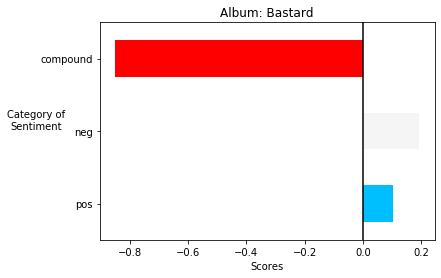

In [48]:
plt.title('Album: Bastard')
plt.ylabel('Category of\nSentiment',rotation=0)
plt.xlabel('Scores')
plt.axvline(0,color='k')
grouped_by_album.iloc[0].plot(#figsize=(3,3),
    kind='barh',color=['deepskyblue','whitesmoke','red'])


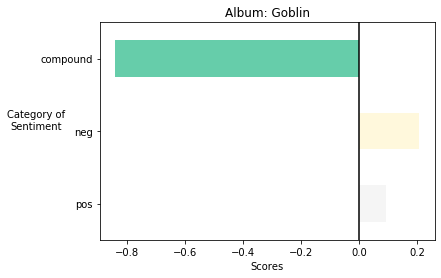

In [49]:
plt.title('Album: Goblin')
plt.ylabel('Category of\nSentiment',rotation=0)
plt.xlabel('Scores')
plt.axvline(0,color='k')
grouped_by_album.iloc[1].plot(#figsize=(3,3),
    kind='barh',color=['whitesmoke','cornsilk','mediumaquamarine'])


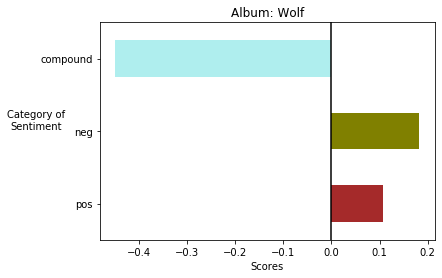

In [50]:
plt.title('Album: Wolf')
plt.ylabel('Category of\nSentiment',rotation=0)
plt.xlabel('Scores')
plt.axvline(0,color='k')
grouped_by_album.iloc[2].plot(#figsize=(3,3),
    kind='barh',color=['brown','olive','paleturquoise'])


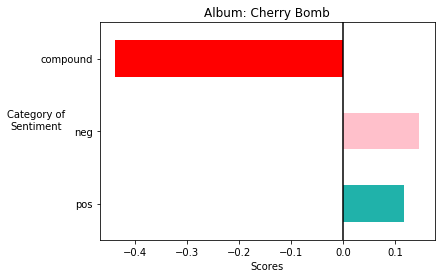

In [51]:
plt.title('Album: Cherry Bomb')
plt.ylabel('Category of\nSentiment',rotation=0)
plt.xlabel('Scores')
plt.axvline(0,color='k')
grouped_by_album.iloc[3].plot(#figsize=(3,3),
    kind='barh',color=['lightseagreen','pink','red'])


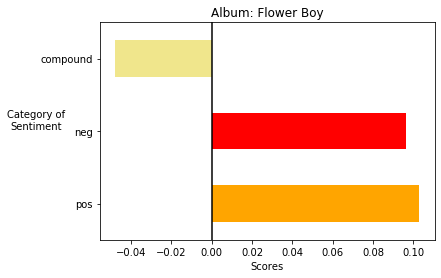

In [52]:
plt.title('Album: Flower Boy')
plt.ylabel('Category of\nSentiment',rotation=0)
plt.xlabel('Scores')
plt.axvline(0,color='k')
grouped_by_album.iloc[4].plot(#figsize=(3,3),
    kind='barh',color=['orange','red','khaki'])


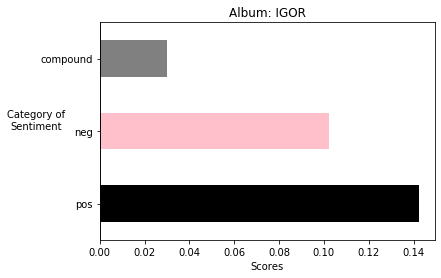

In [53]:
plt.title('Album: IGOR')
plt.ylabel('Category of\nSentiment',rotation=0)
plt.xlabel('Scores')
plt.axvline(0,color='k')
grouped_by_album.iloc[5].plot(#figsize=(3,3),
    kind='barh',color=['black','pink','grey'])


In [56]:
df[df['album']=='Flower Boy']

,neg,neu,pos,compound,lyrics,album,year
65,0.069,0.832,0.099,0.9143,"<i>[Tyler, The Creator:]</i> How many cars can...",Flower Boy,2017
66,0.082,0.847,0.070,-0.7440,"<i>[Tyler, The Creator:]</i> Ayo Let take it b...",Flower Boy,2017
67,0.000,0.875,0.125,0.5913,"Sometimes, I sit in my room ""It's Golf Radio,...",Flower Boy,2017
68,0.100,0.749,0.151,0.8642,"<i>[Tyler, The Creator:]</i> Okay, okay, okay,...",Flower Boy,2017
69,0.167,0.742,0.091,-0.9954,"<i>[Tyler, The Creator:]</i> Yo, who dat boy? ...",Flower Boy,2017
70,0.072,0.833,0.095,0.9368,"<i>[Tyler, The Creator:]</i> My mother warned ...",Flower Boy,2017
71,0.022,0.857,0.121,0.9697,"<i>[Estelle:]</i> Don't kill the rose Boy, it ...",Flower Boy,2017
72,0.115,0.747,0.137,0.9773,<i>[Rex Orange County &amp; Corinne Bailey:]</...,Flower Boy,2017
73,0.138,0.769,0.092,-0.9865,Right now we got some new music only here on G...,Flower Boy,2017
74,0.175,0.750,0.075,-0.9984,"<i>[""911"":]</i> <i>[Tyler, The Creator:]</i> ...",Flower Boy,2017
